# Allen model for mitochondria image

Load the image and convert into brightfield_array

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tifffile
from tifffile import imread
from matplotlib.backends.backend_pdf import PdfPages
import glob, os, re

from aicsimageio import AICSImage, imread, writers
from skimage import color, io

In [10]:
files = glob.glob('210812_6hr_70nm_630X9-20210824T174318Z-001/*.tif')
files.sort()
#files
#print(len(files))

In [3]:
Fluro_images = []
Grayscale_Fluro_images = []
Brightfield_images = []

Fluro_images =files[0::2]
#print(Fluro_images) 

Brightfield_images =files[1::2]
print(Brightfield_images) 
   

['210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z00_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z01_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z02_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z03_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z04_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z05_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z06_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z07_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z08_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z09_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z10_ch01.tif', '210812_6hr_70nm_630X9-20210824T174318Z-001/210812_6hr_70nm_630X9_z11_ch01.tif', '210812_6hr_70nm_630X9-2021

# convert z stack to ome.tif file 

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tifffile
from tifffile import imread
from matplotlib.backends.backend_pdf import PdfPages
import glob, os, re

from aicsimageio import AICSImage, imread, writers
from skimage import color, io

In [6]:
files = Brightfield_images
z_indicator = '_z(\d\d)'
regex_z = re.compile(z_indicator)

def sort_key(file):
    return regex_z.search(file).group(1)

files.sort(key=sort_key)
brightfld_array = np.expand_dims(np.stack([color.rgb2gray(tifffile.imread(file)) for file in files]), axis=0) # stack all the sorted tiffiles and expand dim to create a "channel dim"
# z-score normalize array.
brightfld_array.shape

(1, 70, 1024, 1024)

In [40]:
### Not using fluro_img just calculating####
##-------------------------------------------------------------------------------
files = Fluro_images
z_indicator = '_z(\d\d)'
regex_z = re.compile(z_indicator)

def sort_key(file):
    return regex_z.search(file).group(1)

files.sort(key=sort_key)
fluroscense_array = np.expand_dims(np.stack([color.rgb2gray(tifffile.imread(file)) for file in files]), axis=0) # stack all the sorted tiffiles and expand dim to create a "channel dim"
# z-score normalize array.
fluroscense_array.shape #print(X3.shape)

(1, 70, 1024, 1024)

# For .CSV -Test file :we need image with two channel ,therefore will create single ome file with two brightfield channel

In [7]:
Mix_ch630X9_6hr_X3= np.concatenate((brightfld_array, brightfld_array ), axis=0)
print(Mix_ch630X9_6hr_X3.shape)

(2, 70, 1024, 1024)


In [8]:
with writers.ome_tiff_writer.OmeTiffWriter("tr_1/One-Ome_tif/630x9_6hr_Ome.ome.tif", overwrite_file=True) as writer:
    writer.save(Mix_ch630X9_6hr_X3, dimension_order="CZYX", channel_names=['brightfield','brightfield']) 

In [9]:
X9_image = AICSImage('tr_1/One-Ome_tif/630x9_6hr_Ome.ome.tif')
X9 = X9_image.get_image_data()
print(X9.shape)

(1, 1, 2, 70, 1024, 1024)


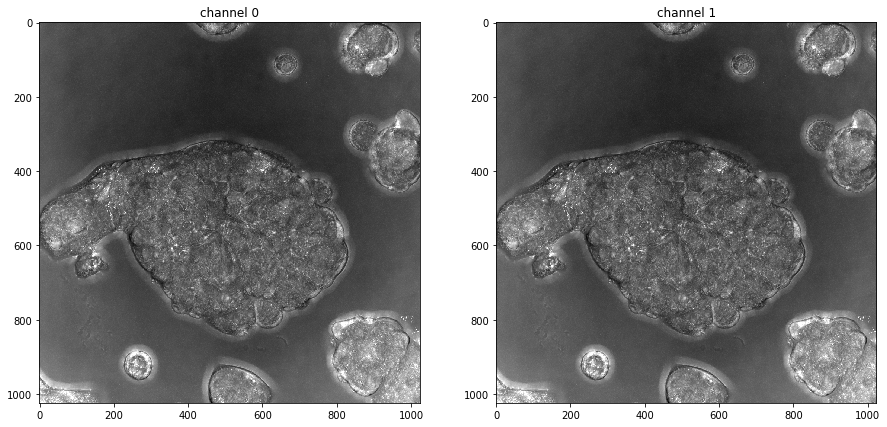

In [35]:
brightfield_1 = AICSImage('tr_1/One-Ome_tif/630x9_6hr_Ome.ome.tif')
BF_1 = brightfield_1.get_image_data()
imbf_image = np.squeeze(np.squeeze(BF_1, axis=0),axis=0)
#  select one of the two sub-arrays[2, 70, 1024, 1024)]
New_imgbf = imbf_image[0]
New_imgbf.shape

for i in range(0, 1):
  
  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches(15,8 )
  # Plot sample and reconstruciton
  axes[0].imshow(np.max(imbf_image[0],axis=0), cmap='gray')
  axes[0].set_title('channel 0')
  axes[1].imshow(np.max(imbf_image[1],axis=0), cmap='gray')
  axes[1].set_title('channel 1')
    
  plt.show()

# Add the image path to .csv test file for computation

In [41]:
import pandas as pd

df = pd.read_csv("N_test - Copy.csv", sep=",")
# visulize csv file
df.head(10)
print (df['path_tiff'])

0    /ihome/zsiddiqu/singhp/tr_1/One-Ome_tif/630x9_...
Name: path_tiff, dtype: object


# run the predict function
fnet predict --path_model_dir "/ihome/zsiddiqu/singhp/old_model/model.p" --dataset fnet.data.MultiChTiffDataset --dataset_kwargs '{"path_csv": "/ihome/zsiddiqu/singhp/N_test - Copy.csv"}' --gpu_ids 0

# visualize the predicting result

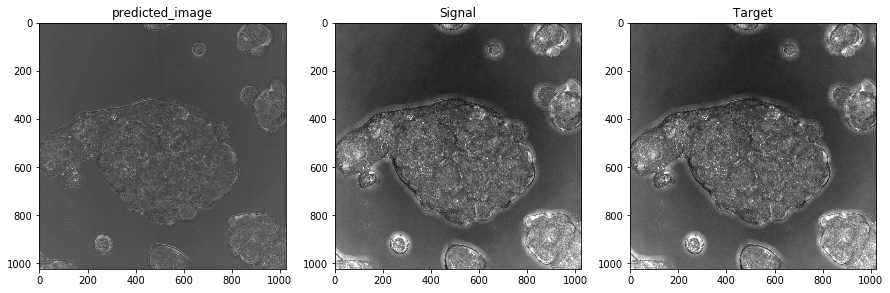

In [39]:
predict_1 = AICSImage('predictions/tifs/0_prediction_c0.model.p.tif')
P_1 = predict_1.get_image_data()
signal_1 = AICSImage('predictions/tifs/0_signal.tif')
S_1 =signal_1.get_image_data()
target_1 = AICSImage('predictions/tifs/0_target.tif')
T_1 = target_1.get_image_data()


P1_image = np.squeeze(np.squeeze(np.squeeze(P_1, axis=0),axis=1),axis=0)
S1_image = np.squeeze(np.squeeze(np.squeeze(S_1, axis=0),axis=1),axis=0)
T1_image = np.squeeze(np.squeeze(np.squeeze(T_1, axis=0),axis=1),axis=0)

for j in range(0, 1):
  
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(15,8 )
  # Plot sample and reconstruciton
  axes[0].imshow(np.max(P1_image,axis=0), cmap='gray')
  axes[0].set_title('predicted_image')
  axes[1].imshow(np.max(S1_image,axis=0), cmap='gray')
  axes[1].set_title('Signal')
  axes[2].imshow(np.max(T1_image,axis=0), cmap='gray')
  axes[2].set_title('Target')

  plt.show()